In [59]:
import math
import scipy
import numpy as np
from numpy.fft import fft
from scipy.integrate import quad
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm

# Model Parametrs

In [60]:
S0 = 0.00001
S1 = 200.
K = 80.
r = 0.05
T = 1.
sigma = 0.2

In [61]:
n = 500
S = scipy.linspace(S0, S1, n)

# Delta
Это количество акций, которыми можно захеджировать опцион

$d_{\pm} = \frac{ln(\frac{S}{K}) + (r \pm \sigma^2/2)(T - t)}{\sigma\sqrt{T - t}}$

In [62]:
def d1(Sp, t):
    return (np.log(Sp / K) + (r + sigma ** 2 / 2) * t) / (sigma * np.sqrt(t)) 

In [63]:
def d1_div(Sp, t):
    return (np.log(Sp / K) + (r - q + sigma ** 2 / 2) * t) / (sigma * np.sqrt(t)) 

In [64]:
def d2(Sp, t):
    return d1(Sp, t) - sigma * np.sqrt(t)

In [65]:
def d2_div(Sp, t):
    return d1_div(Sp, t) - sigma * np.sqrt(t)

In [66]:
def f(x):
    return norm.pdf(x)

In [67]:
def F(x):
    return stats.norm.cdf(x)

In [226]:
#D1 = Delta_Call(S, 0.2)
def Delta_call(S, T):
    return F(d1(S, T))

In [153]:
def Delta_put(S, T):
    return Delta_call(S, T) - 1

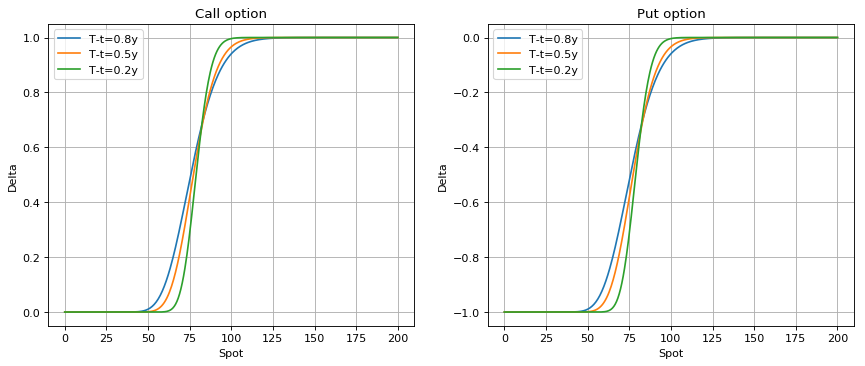

In [157]:
fig=plt.figure(figsize=(13, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(121)
plt.plot(S, Delta_call(S, 0.8))
plt.plot(S, Delta_call(S, 0.5))
plt.plot(S, Delta_call(S, 0.2))
plt.title('Call option')
plt.legend(['T-t=0.8y', 'T-t=0.5y', 'T-t=0.2y'])
plt.xlabel('Spot')
plt.ylabel('Delta')
plt.grid(True)

plt.subplot(122)
plt.plot(S, Delta_put(S, 0.8))
plt.plot(S, Delta_put(S, 0.5))
plt.plot(S, Delta_put(S, 0.2))
plt.title('Put option')
plt.legend(['T-t=0.8y', 'T-t=0.5y', 'T-t=0.2y'])
plt.xlabel('Spot')
plt.ylabel('Delta')
plt.grid(True)

plt.show()

In [235]:
K = 80.
r = 0.05
T = 1.
sigma = 0.2

In [172]:
n = 500.
ttm = scipy.linspace(0.0001, 100., n)

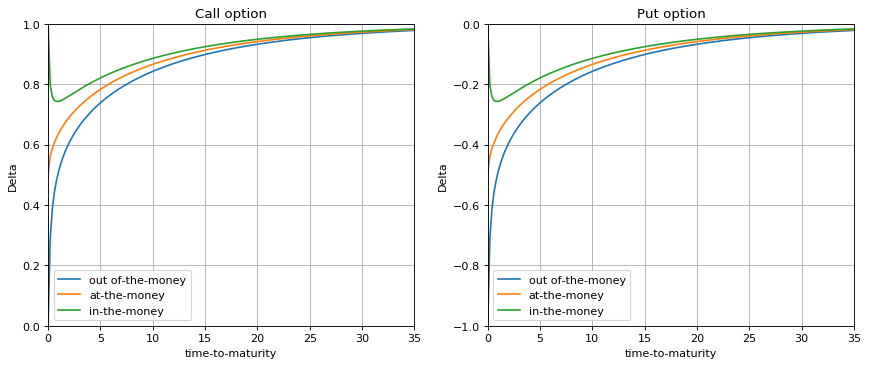

In [238]:
fig=plt.figure(figsize=(13, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(121)
plt.plot(ttm, Delta_call(75, ttm))
plt.plot(ttm, Delta_call(80, ttm))
plt.plot(ttm, Delta_call(85, ttm))
plt.title('Call option')
plt.legend(['out of-the-money', 'at-the-money', 'in-the-money'])
plt.axis([0, 35, 0, 1.])
plt.xlabel('time-to-maturity')
plt.ylabel('Delta')
plt.grid(True)

plt.subplot(122)
plt.plot(ttm, Delta_put(75, ttm))
plt.plot(ttm, Delta_put(80, ttm))
plt.plot(ttm, Delta_put(85, ttm))
plt.title('Put option')
plt.legend(['out of-the-money', 'at-the-money', 'in-the-money'])
plt.axis([0, 35, -1, 0])
plt.xlabel('time-to-maturity')
plt.ylabel('Delta')
plt.grid(True)
plt.show()
#найти и написать асимптоты

ATM: $f(0) = 0.5$

OTM: $f(0) = -inf$

ITM: $f(0) = 1$

# Gamma

$gamma_{C_{E}} = \frac{1}{S\sigma\sqrt{T-t}} delta_{C_{E}}'$

In [181]:
def Gamma_call(S, T):
    return f(d1(S, T)) / (S * sigma * np.sqrt(T))

def Gamma_put(S, T):
    return f(d1(S, T)) / (S * sigma * np.sqrt(T))

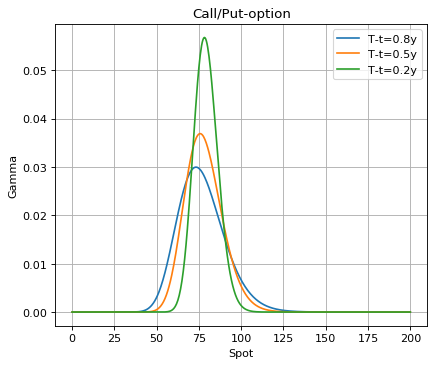

In [185]:
fig=plt.figure(figsize=(6, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(S, Gamma_call(S, 0.8))
plt.plot(S, Gamma_call(S, 0.5))
plt.plot(S, Gamma_call(S, 0.2))
plt.title('Call/Put-option')
plt.legend(['T-t=0.8y', 'T-t=0.5y', 'T-t=0.2y'])
plt.xlabel('Spot')
plt.ylabel('Gamma')
plt.grid(True)
plt.show()

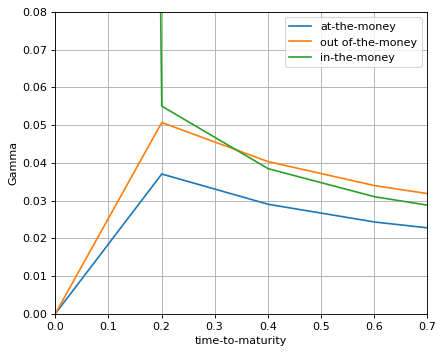

In [186]:
fig=plt.figure(figsize=(6, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(ttm, Gamma_call(85, ttm))
plt.plot(ttm, Gamma_call(75, ttm))
plt.plot(ttm, Gamma_call(80, ttm))
plt.legend(['at-the-money', 'out of-the-money', 'in-the-money'])
plt.axis([0, 0.7, 0, 0.08])
plt.xlabel('time-to-maturity')
plt.ylabel('Gamma')
plt.grid(True)
plt.show()

# Vega

$vega_{C_{E}} = delta_{C_{E}}' S\sqrt{T-t}$

In [187]:
def Vega_call(S, T):
    return S * f(d1(S, T)) * np.sqrt(T)

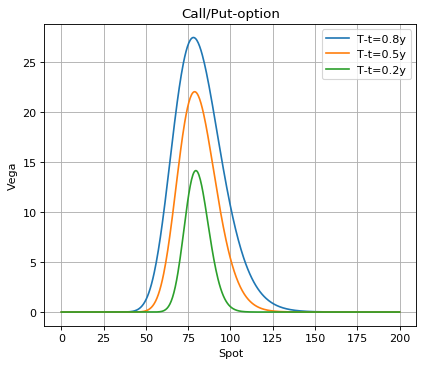

In [190]:
fig=plt.figure(figsize=(6, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(S, Vega_call(S, 0.8))
plt.plot(S, Vega_call(S, 0.5))
plt.plot(S, Vega_call(S, 0.2))
plt.title('Call/Put-option')
plt.legend(['T-t=0.8y', 'T-t=0.5y', 'T-t=0.2y'])
plt.xlabel('Spot')
plt.ylabel('Vega')
plt.grid(True)
# plt.annotate('max', xy=(100, 28), xytext=(120, 30),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )
plt.show()

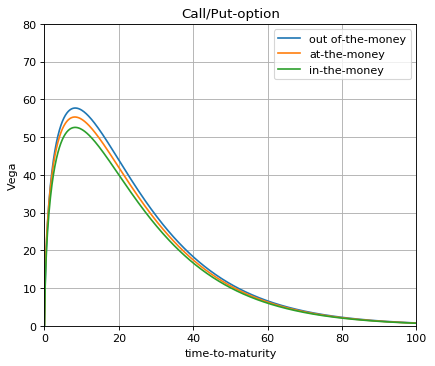

In [193]:
fig=plt.figure(figsize=(6, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(ttm, Vega_call(75, ttm))
plt.plot(ttm, Vega_call(80, ttm))
plt.plot(ttm, Vega_call(85, ttm))
plt.title('Call/Put-option')
plt.legend(['out of-the-money', 'at-the-money', 'in-the-money'])
plt.axis([0, 100, 0, 80])
plt.xlabel('time-to-maturity')
plt.ylabel('Vega')
plt.grid(True)
plt.show()

In [194]:
# GV = G1 / V1

In [195]:
# plt.plot(V1, G1)
# plt.xlabel('Spot')
# plt.ylabel('Vega')
# plt.grid(True)
# plt.show()

# Volatility

In [197]:
S0 = 0.00001
S1 = 200
K = 80
r = 0.05
T = 0.5
sigma = 0.2

In [198]:
n = 500
S = scipy.linspace(S0, S1, n)

In [201]:
def d1_vol(S, sigma):
    return (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T)) 

In [202]:
def Delta_call_vol(S, sigma):
    return F(d1_vol(S, sigma))

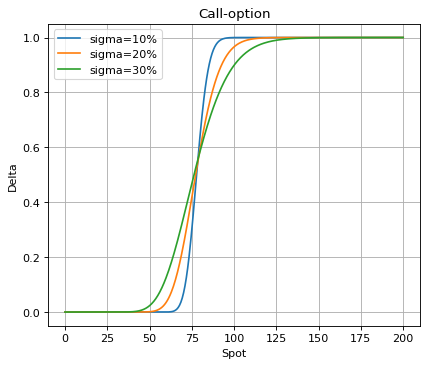

In [209]:
fig=plt.figure(figsize=(6, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(S, Delta_call_vol(S, 0.1))
plt.plot(S, Delta_call_vol(S, 0.2))
plt.plot(S, Delta_call_vol(S, 0.3))
plt.title('Call-option')
plt.legend(['sigma=10%', 'sigma=20%', 'sigma=30%'])
plt.xlabel('Spot')
plt.ylabel('Delta')
plt.grid(True)
plt.show()

In [207]:
def Gamma_call_vol(S, sigma):
    return f(d1_vol(S, sigma)) / (S * sigma * np.sqrt(T))

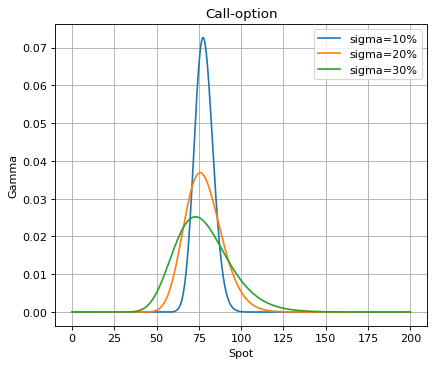

In [210]:
fig=plt.figure(figsize=(6, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(S, Gamma_call_vol(S, 0.1))
plt.plot(S, Gamma_call_vol(S, 0.2))
plt.plot(S, Gamma_call_vol(S, 0.3))
plt.title('Call-option')
plt.legend(['sigma=10%', 'sigma=20%', 'sigma=30%'])
plt.xlabel('Spot')
plt.ylabel('Gamma')
plt.grid(True)
plt.show()

In [213]:
def Vega_call_vol(S, sigma):
    return S * f(d1_vol(S, sigma)) * np.sqrt(T)

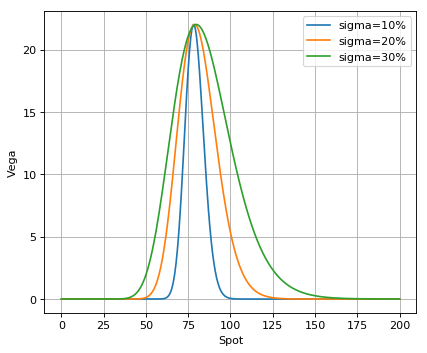

In [215]:
fig=plt.figure(figsize=(6, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(S, Vega_call_vol(S, 0.1))
plt.plot(S, Vega_call_vol(S, 0.2))
plt.plot(S, Vega_call_vol(S, 0.3))
plt.legend(['sigma=10%', 'sigma=20%', 'sigma=30%'])
plt.xlabel('Spot')
plt.ylabel('Vega')
plt.grid(True)
plt.show()

# r = 0 (Надо прояснить)

S0 = 0.00001
S1 = 200
K = 80
r = 0.
T = 1.
sigma = 0.2

n = 500
S = scipy.linspace(S0, S1, n)



G1 = f(d1(S, 0.8)) / (S * sigma * np.sqrt(0.8))
G2 = f(d1(S, 0.5)) / (S * sigma * np.sqrt(0.5))
G3 = f(d1(S, 0.2)) / (S * sigma * np.sqrt(0.2))

plt.plot(S, G1)
plt.plot(S, G2)
plt.plot(S, G3)
plt.legend(['T-t=0.8y', 'T-t=0.5y', 'T-t=0.2y'])
plt.xlabel('Spot')
plt.ylabel('Gamma')
plt.grid(True)
plt.show()

V1 = S * f(d1(S, 0.8)) * np.sqrt(0.8)
V2 = S * f(d1(S, 0.5)) * np.sqrt(0.5)
V3 = S * f(d1(S, 0.2)) * np.sqrt(0.2)

plt.plot(S, V1)
plt.plot(S, V2)
plt.plot(S, V3)
plt.legend(['T-t=0.8y', 'T-t=0.5y', 'T-t=0.2y'])
plt.xlabel('Spot')
plt.ylabel('Vega')
plt.grid(True)
plt.show()

#### Time value = market price - intrinsic value(Underlying - Strike)


it depends on the implied volatility and stock price

#### Time value = Premium - Intrinsic Value

Time value decreases due to the time decay


# Theta

### $theta_{C_{E}} = -\frac{S\sigma}{2\sqrt{T-t}}N'(d_{+}) - rKe^{-r(T-t)}N(d_{-})$


Theta показывает, как цена опциона меняется в цене при приближении к сроку экспирации при неизменной implied volatility

Для long-позиций theta отрицательная, для short - положительная

Когда мы находимся в позиции long, для получениея большей прибыли необходимо, чтобы росла цента актива, либо же увеличивалась волатильность. Однако все это должно произойти в ограниченный промежуток времени и чем меньше этот промежуток, тем меньше будет стоимость опциона, так как вероятность благоприятных исходов уменьшается.

В позиции short theta положительная, можно продать опцион в момент T1 и в момент времени T2 купить его, чтобы закрыть сделку. Однако extrinsic value опциона будет в T2 уже меньше и на этом можно заработать.

In [118]:
S0 = 0.00001
S1 = 200.
K = 80.
r = 0.05
q = 0.05
T = 1.
sigma = 0.2
n = 500
S = scipy.linspace(S0, S1, n)
ttm = scipy.linspace(0.01, 1, n)

In [116]:
# Тета call опциона
def Th_call(T, S):
    return - S * sigma * f(d1(S, T)) / (2 * T ** 0.5) - r * K * np.e ** (- r * T) * F(d2(S, T))

# def Th_call_div(T, S):
#     return - S * sigma * f(d1_div(S, T)) / (2 * T ** 0.5) - (r - q) * K * np.e ** (- (r - q) * T) * F(d2_div(S, T))

def Th_call_div(T, S):
    return 1  * (- (S * sigma * np.e**(-q * T) / (2 * T**0.5) * 1 / (2 * np.pi)**0.5 * np.e**(- d1_div(S, T)**2 / 2)) - r * K * np.e**(- r * T) * F(d2_div(S, T)) + q * S * np.e**( - q * T) * F(d1_div(S, T)))

In [103]:
# Тета форварда
def Th_forv(T, S):
    return  - K * r * np.e ** (- r * T)

In [104]:
# Тета put опциона
def Th_put(T, S):
    return Th_call(T, S) - Th_forv(T, S)

def Th_put_div(T, S):
    return Th_call_div(T, S) - Th_forv(T, S)

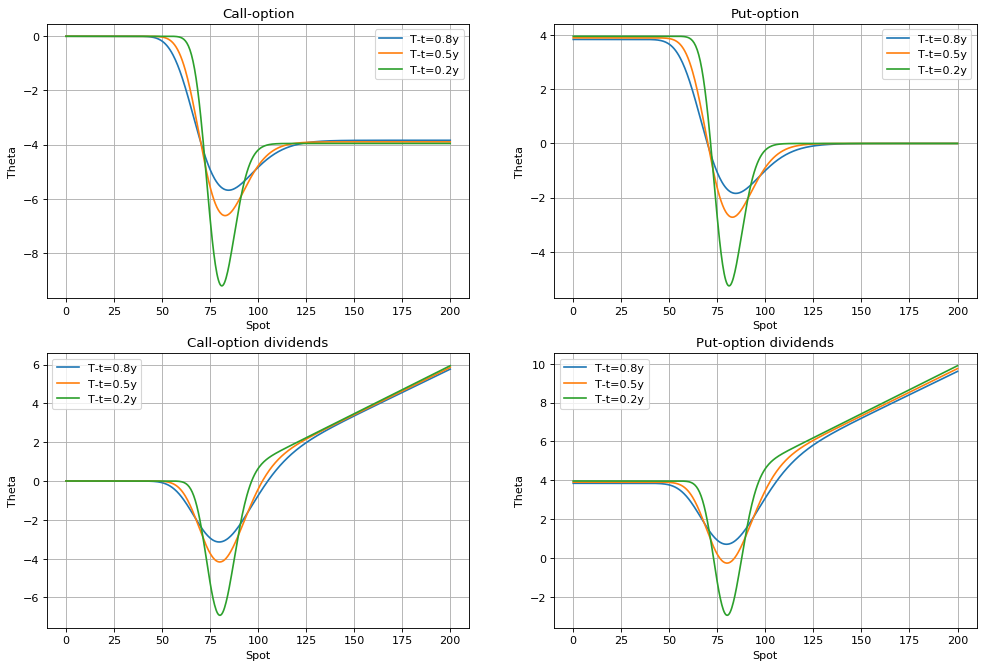

In [125]:
fig=plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(221)
plt.plot(S, Th_call(0.8, S))
plt.plot(S, Th_call(0.5, S))
plt.plot(S, Th_call(0.2, S))
plt.title('Call-option')
plt.legend(['T-t=0.8y', 'T-t=0.5y', 'T-t=0.2y'])
plt.xlabel('Spot')
plt.ylabel('Theta')
plt.grid(True)
# plt.show()

plt.subplot(222)
plt.plot(S, Th_put(0.8, S))
plt.plot(S, Th_put(0.5, S))
plt.plot(S, Th_put(0.2, S))
plt.title('Put-option')
plt.legend(['T-t=0.8y', 'T-t=0.5y', 'T-t=0.2y'])
plt.xlabel('Spot')
plt.ylabel('Theta')
plt.grid(True)

plt.subplot(223)
plt.plot(S, Th_call_div(0.8, S))
plt.plot(S, Th_call_div(0.5, S))
plt.plot(S, Th_call_div(0.2, S))
plt.title('Call-option dividends')
plt.legend(['T-t=0.8y', 'T-t=0.5y', 'T-t=0.2y'])
plt.xlabel('Spot')
plt.ylabel('Theta')
plt.grid(True)
# plt.show()

plt.subplot(224)
plt.plot(S, Th_put_div(0.8, S))
plt.plot(S, Th_put_div(0.5, S))
plt.plot(S, Th_put_div(0.2, S))
plt.title('Put-option dividends')
plt.legend(['T-t=0.8y', 'T-t=0.5y', 'T-t=0.2y'])
plt.xlabel('Spot')
plt.ylabel('Theta')
plt.grid(True)

plt.show()

На графике выше можно видеть, что theta минимальна в at-the-money, так как в таком случае цена опциона состоит целиком из time value, которое в свою очередь зависит от implied volatility и цены активы


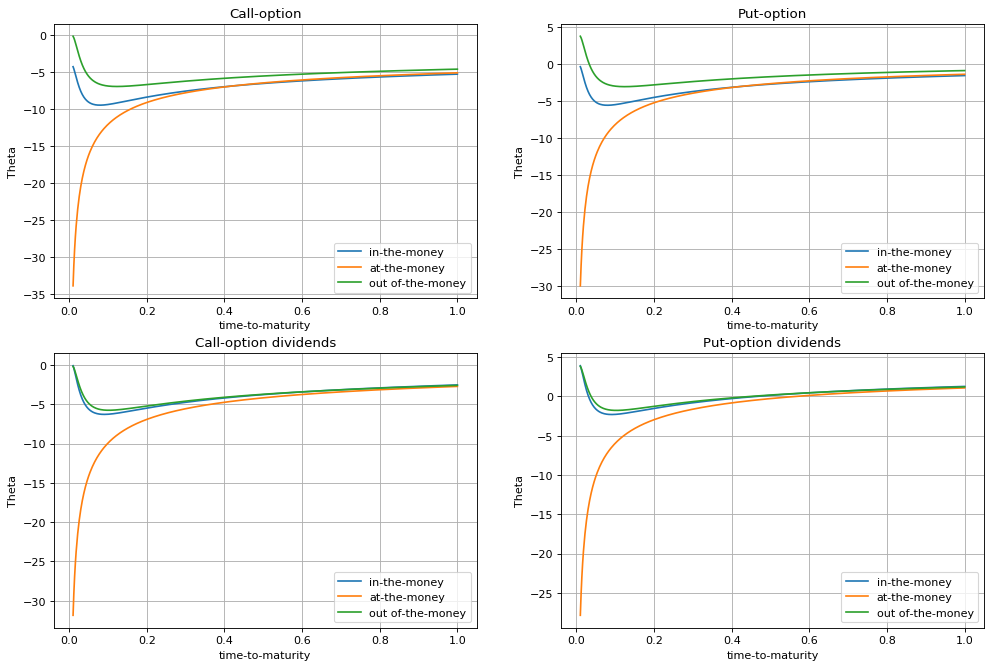

In [124]:
fig=plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(221)
plt.plot(ttm, Th_call(ttm, 85))
plt.plot(ttm, Th_call(ttm, 80))
plt.plot(ttm, Th_call(ttm, 75))
plt.title('Call-option')
plt.legend(['in-the-money', 'at-the-money', 'out of-the-money'])
plt.xlabel('time-to-maturity')
plt.ylabel('Theta')
plt.grid(True)

plt.subplot(222)
plt.plot(ttm, Th_put(ttm, 85))
plt.plot(ttm, Th_put(ttm, 80))
plt.plot(ttm, Th_put(ttm, 75))
plt.title('Put-option')
plt.legend(['in-the-money', 'at-the-money', 'out of-the-money'])
plt.xlabel('time-to-maturity')
plt.ylabel('Theta')
plt.grid(True)

plt.subplot(223)
plt.plot(ttm, Th_call_div(ttm, 85))
plt.plot(ttm, Th_call_div(ttm, 80))
plt.plot(ttm, Th_call_div(ttm, 75))
plt.title('Call-option dividends')
plt.legend(['in-the-money', 'at-the-money', 'out of-the-money'])
plt.xlabel('time-to-maturity')
plt.ylabel('Theta')
plt.grid(True)

plt.subplot(224)
plt.plot(ttm, Th_put_div(ttm, 85))
plt.plot(ttm, Th_put_div(ttm, 80))
plt.plot(ttm, Th_put_div(ttm, 75))
plt.title('Put-option dividends')
plt.legend(['in-the-money', 'at-the-money', 'out of-the-money'])
plt.xlabel('time-to-maturity')
plt.ylabel('Theta')
plt.grid(True)

plt.show()

На графике выше можно видеть, что at-the-money option будет терять деньги вплоть до последнего, так как всегда будет оставаться неопределенность с возможностью осуществления благоприятных условий на рынке.
    В то же время эта неопределнность будет ниже для OTM и ITM опционов и при приближении к экспирации падение цены замедлится.

ATM: $f(0) = - inf$

ITM: $f(0) = -4$

OTM: $f(0) = 0$

Forvard: $f(0) = -4$


In [107]:
Th_call(0.00000001, 85) / 0.00000001

prev = Th_call(0.1, 85)
eps = 0.00000000001
for i in np.arange(0.2, 100000, 0.1):
    y = Th_call(i, 85) / i
    if abs(y - prev) < eps:
        break
    prev = y    
print y  
print i

-1.86973341618e-09
314.6


In [108]:
Th_call(0.02, 85) / 0.02

-305.0450239231069

# Rho

### $rho_{C_{E}} = (T - t)Ke^{-r(T - t)}N(d_{-})$

In [121]:
def Rho_call(T, S):
    return T * K * np.e ** (- r * T) * F(d2(S, T))

In [133]:
def Rho_put(T, S):
    return Rho_call(T, S) - K * (T) * np.e**(- r * (T))

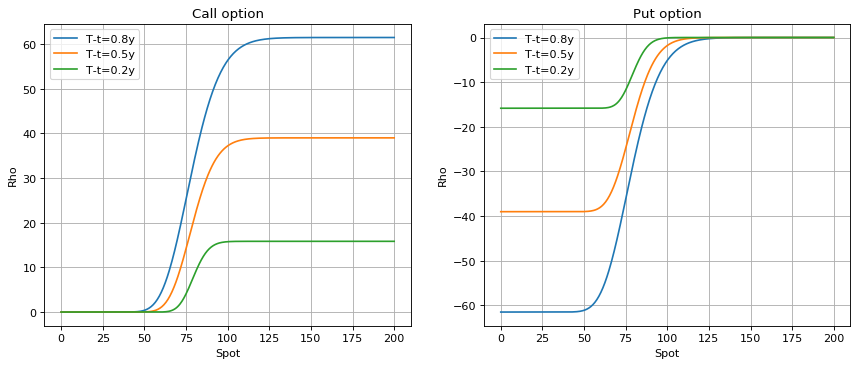

In [136]:
fig=plt.figure(figsize=(13, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(121)
plt.plot(S, Rho_call(0.8, S))
plt.plot(S, Rho_call(0.5, S))
plt.plot(S, Rho_call(0.2, S))
plt.title('Call option')
plt.legend(['T-t=0.8y', 'T-t=0.5y', 'T-t=0.2y'])
plt.xlabel('Spot')
plt.ylabel('Rho')
plt.grid(True)

plt.subplot(122)
plt.plot(S, Rho_put(0.8, S))
plt.plot(S, Rho_put(0.5, S))
plt.plot(S, Rho_put(0.2, S))
plt.title('Put option')
plt.legend(['T-t=0.8y', 'T-t=0.5y', 'T-t=0.2y'])
plt.xlabel('Spot')
plt.ylabel('Rho')
plt.grid(True)

plt.show()

Асимптота: $f(x) = K(T - t)e^{-r(T - t)}$

In [145]:
def f1(T):
    return K * T * np.e**(- r * T)

In [142]:
print Rho_call(0.8, 300)
print 0.8 * K * np.e**(- r * 0.8)

61.4905241057
61.4905241057


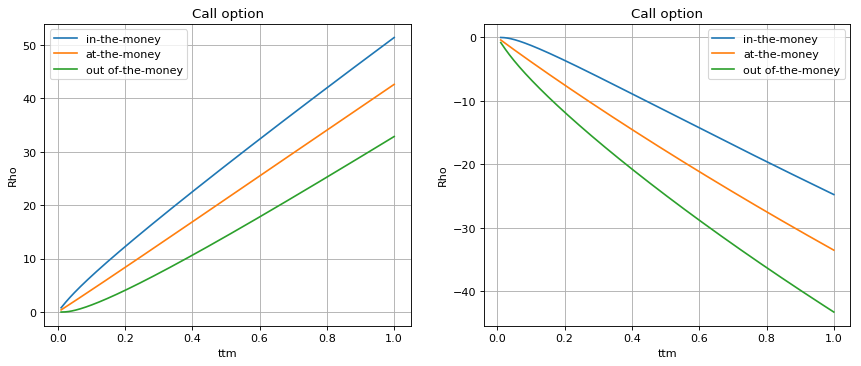

In [148]:
fig=plt.figure(figsize=(13, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(121)
plt.plot(ttm, Rho_call(ttm, 85))
plt.plot(ttm, Rho_call(ttm, 80))
plt.plot(ttm, Rho_call(ttm, 75))
plt.title('Call option')
plt.legend(['in-the-money', 'at-the-money', 'out of-the-money'])
plt.xlabel('ttm')
plt.ylabel('Rho')
plt.grid(True)

plt.subplot(122)
plt.plot(ttm, Rho_put(ttm, 85))
plt.plot(ttm, Rho_put(ttm, 80))
plt.plot(ttm, Rho_put(ttm, 75))
plt.title('Call option')
plt.legend(['in-the-money', 'at-the-money', 'out of-the-money'])
plt.xlabel('ttm')
plt.ylabel('Rho')
plt.grid(True)

plt.show()